In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Impute missing values with mean
diabetes_data.fillna(diabetes_data.mean(), inplace=True)

In [5]:
# Split features and target variable
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Implement Logistic Regression with different regularization parameters
regularization_params = [0.01, 0.1, 1, 10, 100]
accuracy_scores = []


In [12]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7532467532467533

In [20]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[79 20]
 [18 37]]


In [14]:
for C in regularization_params:
    # Create and fit Logistic Regression model
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Print the confusion matrix for each model
    print(f"Confusion Matrix for C={C}:")
    print(confusion_matrix(y_test, y_pred))
    print()

Confusion Matrix for C=0.01:
[[77 22]
 [20 35]]

Confusion Matrix for C=0.1:
[[82 17]
 [18 37]]

Confusion Matrix for C=1:
[[78 21]
 [18 37]]

Confusion Matrix for C=10:
[[81 18]
 [18 37]]

Confusion Matrix for C=100:
[[79 20]
 [18 37]]



c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [27]:
# Define labels
classes = ['Actual Negative', 'Actual Positive']
predicted_classes = ['Predicted Negative', 'Predicted Positive']

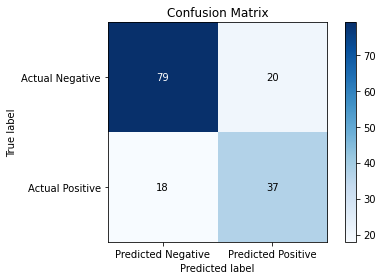

In [28]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, predicted_classes)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

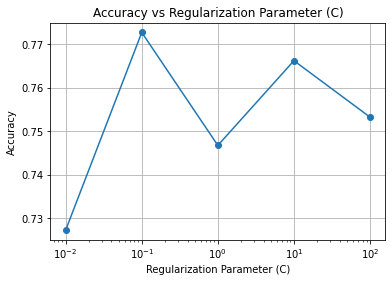

In [9]:
# Plot the accuracy scores for different regularization parameters
plt.plot(regularization_params, accuracy_scores, marker='o')
plt.title('Accuracy vs Regularization Parameter (C)')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)
plt.show()